In [30]:
import pickle
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns

In [12]:
def get_df_from_data(path, name):
    dflist = []
    for elem in path.glob("**/bcounts.pkl"):
        dictionary = pickle.load(open(elem, 'rb'))
        cumul = 0
        for key, matrix in dictionary.items():
            dim = key
            dflist.append([dim, np.sum(np.tril(matrix)), 'BE', name])
            cumul += np.sum(np.tril(matrix))
            dflist.append([dim, cumul, 'BEcumul', name])
            dflist.append([dim, np.sum(np.tril(matrix))/matrix[0][1], 'BEratio', name])
    return pd.DataFrame(dflist, columns = ['dimension', 'count', 'type', 'name'])
            
        

In [18]:
u = pd.concat([get_df_from_data(Path(f"data/bcounts/underlying_{i}"), "Underlying") for i in range(1,4)], ignore_index=True)

<ipython-input-12-edeb52b98c64>:11: RuntimeWarning: invalid value encountered in double_scalars
  dflist.append([dim, np.sum(np.tril(matrix))/matrix[0][1], 'BEratio', name])


In [22]:
b = get_df_from_data(Path(f"data/bcounts/bshuffled"), "Bshuffled")

<ipython-input-12-edeb52b98c64>:11: RuntimeWarning: invalid value encountered in double_scalars
  dflist.append([dim, np.sum(np.tril(matrix))/matrix[0][1], 'BEratio', name])


In [23]:
c = get_df_from_data(Path("data/bcounts/column"), "Column")

<ipython-input-12-edeb52b98c64>:11: RuntimeWarning: invalid value encountered in double_scalars
  dflist.append([dim, np.sum(np.tril(matrix))/matrix[0][1], 'BEratio', name])


In [38]:
a = get_df_from_data(Path("data/bcounts/adjusted"), "Adjusted")

<ipython-input-12-edeb52b98c64>:11: RuntimeWarning: invalid value encountered in double_scalars
  dflist.append([dim, np.sum(np.tril(matrix))/matrix[0][1], 'BEratio', name])


In [39]:
df = pd.concat([u,b,c,a])

<AxesSubplot:xlabel='dimension', ylabel='count'>

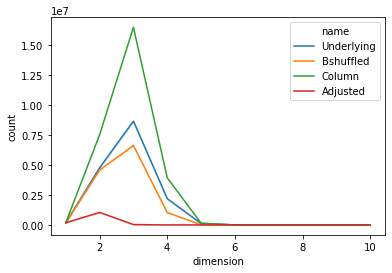

In [40]:
sns.lineplot(data = df[df['type'] == 'BE'], x = 'dimension', y = 'count', hue = 'name')

<AxesSubplot:xlabel='dimension', ylabel='count'>

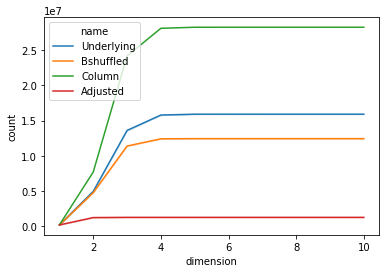

In [41]:
sns.lineplot(data = df[df['type'] == 'BEcumul'], x = 'dimension', y = 'count', hue = 'name')

<AxesSubplot:xlabel='dimension', ylabel='count'>

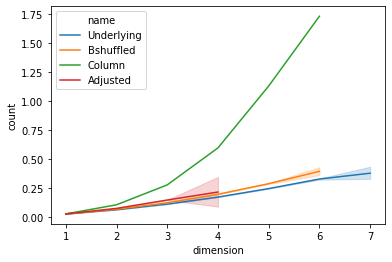

In [42]:
sns.lineplot(data = df[df['type'] == 'BEratio'], x = 'dimension', y = 'count', hue = 'name')